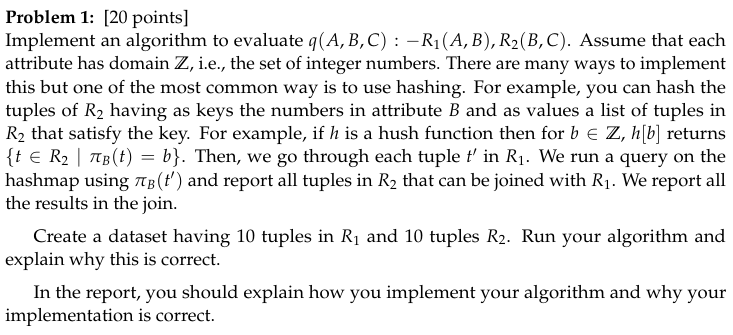

In [ ]:
# Problem 1:
# Creating R1 and R2
R1 = [(47, 7), (67, 54), (10, 20), (61, 10), (91, 32), (96, 5), (24, 65), (20, 64), (32, 51), (65, 42)]
R2 = [(7, 12), (34, 54), (10, 20), (61, 10), (10, 32), (101, 202), (24, 65), (5, 81), (32, 51), (42, 1)]

# Creating a hash table for R2 with attribute B as key
hash_table, res = {}, []

# Looping through each row of R2 to build the hash table
for rowR2 in R2:
    key = rowR2[0]  # Value of attribute B
    if key in hash_table:
        hash_table[key].append(rowR2)
    else:
        hash_table[key] = [rowR2]

# Evaluating the query q(A, B, C) : −R1(A, B), R2(B, C)
# Looping through each row of R1 to find matches in R2 based on attribute B
for rowR1 in R1:
    key = rowR1[1]  # Value of attribute B
    if key in hash_table:
        # If a match is found in R2, append the result tuple to 'res'
        for rowR2 in hash_table[key]:
            res.append((rowR1[0], rowR1[1], rowR2[1]))

# Printing the result
print("R1 = ", R1)
print("R2 = ", R2)
print("Result of the query q(A, B, C) : −R1(A, B), R2(B, C):")
for tuple_result in res:
    print(tuple_result)

R1 =  [(47, 7), (67, 54), (10, 20), (61, 10), (91, 32), (96, 5), (24, 65), (20, 64), (32, 51), (65, 42)]
R2 =  [(7, 12), (34, 54), (10, 20), (61, 10), (10, 32), (101, 202), (24, 65), (5, 81), (32, 51), (42, 1)]
Result of the query q(A, B, C) : −R1(A, B), R2(B, C):
(47, 7, 12)
(61, 10, 20)
(61, 10, 32)
(91, 32, 51)
(96, 5, 81)
(65, 42, 1)


Running of the Algorithm:

1. **Hash Table Creation**: The algorithm first creates a hash table for R2 with attribute B as its key. This hash table organizes tuples from R2 based on their B attribute values. By using a hash table, the algorithm achieves constant-time lookup for tuples based on their B attribute values, which significantly improves efficiency.

2. **Query Evaluation**: After creating the hash table, the algorithm evaluates the query for each tuple in R1. For each tuple in R1, it extracts the value of attribute B. Then, it checks if this value exists as a key in the hash table. If it does, the algorithm retrieves the corresponding list of tuples from R2 that have the same B attribute value.

3. **Join Operation**: For each tuple in the retrieved list from R2, the algorithm constructs a new tuple by combining attributes from R1 and R2. Specifically, it takes the first attribute from the tuple in R1, the value of attribute B from R1, and the second attribute from the tuple in R2.

4. **Result Generation**: The algorithm accumulates these joined tuples into a result list. Each tuple in the result list represents a joined tuple from R1 and R2 based on the specified join condition.

**Correctness of the Algorithm:**

The correctness of the algorithm stems from its adherence to the principles of relational algebra. It correctly implements the specified query, which involves joining tuples from R1 and R2 based on attribute B. The algorithm ensures that it only includes tuples in the result that satisfy the join condition, i.e., matching tuples from R1 and R2 based on their B attribute values. Therefore, the resulting tuples are consistent with the query requirements.

**Efficiency**: By leveraging hashing and constant-time lookup, the algorithm achieves efficiency in accessing tuples from R2 during the join operation. This ensures that the algorithm scales well, even for large datasets, making it suitable for practical use.
Due to the pre-construction of the hash table may be more suitable, as it provides faster lookup times during the join operation in larger dataset.

In [ ]:
# Problem 2
from collections import defaultdict

def hash_join(Ra, Rb):
    hash_map = defaultdict(list)
    for b in Rb:
        hash_map[b[0]].append(b)
    result = []
    for a in Ra:
        if a[1] in hash_map:
            for b in hash_map[a[1]]:
                result.append(a + b[1:])
    return result

def evaluate_k_line_join_query(query, relations):
    S = None
    for relation in query:
        projection = [(tuple_[i], tuple_[i+1]) for tuple_ in relations[relation] for i in range(len(tuple_)-1)]
        if S is None:
            S = projection
        else:
            S = hash_join(S, projection)
    return S

# Example usage
query = ["R1", "R2", "R3"]
relations = {
    "R1": [(1, 2), (2, 3), (3, 4)],
    "R2": [(2, 3), (3, 4), (4, 5)],
    "R3": [(3, 4), (4, 5), (5, 6)]
}

result = evaluate_k_line_join_query(query, relations)
print("Result of k-line join query:", result)
print("Number of tuples in the result:", len(result))


Result of k-line join query: [(2, 3, 4, 4), (3, 4, 5, 5)]
Number of tuples in the result: 2


**Implementation of the algorithm:**

**Hash Join Function (hash_join):**

This function takes two relations, Ra and Rb, and performs the hash join operation.It first constructs a hash map (hash_map) using Rb, where the key is the first attribute of the tuples and the value is a list of tuples with the same key.Then, it iterates through Ra. For each tuple in Ra, it checks if the second attribute exists in the hash map. If it does, it combines the tuples from Ra and Rb and appends them to the result.

Finally, it returns the resulting list of tuples after the join operation.

**Evaluate K-Line Join Query Function (evaluate_k_line_join_query):**
This function takes a k-line join query and a dictionary of relations as input.
For each relation in the query, it constructs a projection, which is a list of tuples containing consecutive attribute pairs.It then iteratively applies the hash join operation to join the relations based on the order specified in the query.

Finally, it returns the result of the k-line join query.

**Efficiency:**
By employing hash join and optimizing the join operation, the algorithm ensures that the computational workload scales linearly with the size of input data and the resulting output, maintaining efficient performance across varying data sets.

The algorithm's time complexity of O(N + OUT)
where,

N represents the size of the input relations.

OUT denotes the size of the output.

This linear complexity ensures scalability and efficiency, making the algorithm suitable for processing large data sets while maintaining acceptable performance levels.








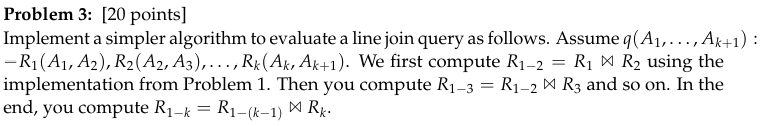

In [ ]:
import time

class HashJoin:
    def __init__(self, tuples):
        # Initializing a hash table
        self.hash_table = {}
        for i in tuples:
            key = i[-1]
            if key in self.hash_table:
                self.hash_table[key].append(i)
            else:
                self.hash_table[key] = [i]
    def __iter__(self):
        # Iterator over the hash table
        for key in self.hash_table:
            for tuple in self.hash_table[key]:
                yield tuple

    def join(self, other):
        # Performing a hash join with another HashJoin instance
        res = []
        for i in other:
            # The join condition involves the first attribute
            key = i[0]
            if key in self.hash_table:
                for same_tuple in self.hash_table[key]:
                    # Joining matching tuples from both relations
                    append_q = list(same_tuple) + list(i[1:])
                    res.append(append_q)
        return res

if __name__ == "__main__":
    # Creating instances of HashJoin for each relation
    R1 = HashJoin([(1, 'a'), (2, 'b'), (3, 'c'),(4, 'd'), (5, 'e'), (6, 'f'),(7, 'g'), (8, 'h'), (9, 'i'), (10, 'j')])
    R2 = HashJoin([('a', 'p'), ('b', 'q'), ('c', 'r'),('d', 's'), ('e', 't'), ('f', 'u'),('g', 'v'), ('h', 'w'), ('i', 'x'),('j', 'y')])
    R3 = HashJoin([('p', 10), ('q', 20), ('r', 30),('s', 40), ('t', 50), ('u', 60),('v', 70), ('w', 80), ('x', 90),('y', 100)])
    R4 = HashJoin([(10, 1.1), (20, 2.2), (30, 3.3),(40, 4.4), (50, 5.5), (60, 6.6),(70, 7.7), (80, 8.8), (90, 9.9),(10, 10.10)])

    start = time.time()
    result = R1.join(R2)
    result = HashJoin(result).join(R3)
    result = HashJoin(result).join(R4)
    # Printing the results
    print("Result of hash join query:")
    for line in result:
        print(line)
    end = time.time()
    print("\nTime Taken = {:.3f}s".format(end - start))


Result of hash join query:
[1, 'a', 'p', 10, 1.1]
[2, 'b', 'q', 20, 2.2]
[3, 'c', 'r', 30, 3.3]
[4, 'd', 's', 40, 4.4]
[5, 'e', 't', 50, 5.5]
[6, 'f', 'u', 60, 6.6]
[7, 'g', 'v', 70, 7.7]
[8, 'h', 'w', 80, 8.8]
[9, 'i', 'x', 90, 9.9]
[1, 'a', 'p', 10, 10.1]

Time Taken = 0.004s


This is a simple algorithm to evaluate a line join query by iteratively joining relations one after another until all relations have been joined.

***Explanation***

1. **Initialization**: The hash join algorithm begins by initializing a hash table. This table is used to organize the tuples from one of the input relations based on a selected attribute (the last attribute here), which acts as the key. Each key in the hash table corresponds to a list of tuples sharing the same key value. This initialization step occurs for each input relation.

2. **Iterating Over Hash Table**: The algorithm provides a method to iterate over the hash table. This method enables accessing each tuple stored in the hash table, allowing for efficient traversal of the data.

3. **Join Operation**: To perform the join operation, the algorithm takes another instance representing a different relation. It iterates over the tuples of this relation. For each tuple, it retrieves the key based on the join condition. If the key exists in the hash table, it iterates over all tuples associated with that key. For each pair of matching tuples, it combines their attributes to create joined tuples, which are then added to the result set.

4. **Joining Process**: The actual joining of relations occurs sequentially. Each input relation is joined with the next one until all relations are processed. This sequential approach ensures that each join operation is performed accurately and efficiently.

5. **Output**: Once all join operations are completed, the resulting set of joined tuples is typically returned or printed as the output of the hash join query.

**Correctness**

This implementation correctly hashes the tuples based on the last element (key) and store them in a hash table. The join method iterates over the tuples of the other relation, retrieves matching tuples from the hash table based on the join condition, and performs the join operation. The overall join operation involving multiple relations seems correct, as each subsequent join operation is based on the previous result.

In [ ]:
import random
import time

def generate_data():
    num_tuples = 100
    range_max = 5000
    R1 = [(i, random.randint(1, range_max)) for i in range(1, num_tuples + 1)]
    R2 = [(random.randint(1, range_max), j) for j in range(1, num_tuples + 1)]
    R3 = [(ℓ, ℓ) for ℓ in range(1, num_tuples + 1)]
    return {"R1": R1, "R2": R2, "R3": R3}

def hash_join(Ra, Rb, join_on):
    hash_map = {}
    result = []
    # Build the hash map
    for a in Ra:
        hash_map.setdefault(a[join_on[0]], []).append(a)
    # Execute the join
    for b in Rb:
        if b[join_on[1]] in hash_map:
            for a in hash_map[b[join_on[1]]]:
                result.append(a + b)
    return result

def perform_joins(relations):
    # Join R1 with R2 on R1.x = R2.y
    start_time = time.time()
    R1_R2 = hash_join(relations['R1'], relations['R2'], (1, 0))
    mid_time = time.time()
    # Join (R1 R2) with R3 on R2.j = R3.ℓ
    final_result = hash_join(R1_R2, relations['R3'], (-1, 0))
    end_time = time.time()

    # Output join timing information
    print(f"Time to join R1 and R2: {mid_time - start_time:.6f} seconds")
    print(f"Time to join (R1 R2) and R3: {end_time - mid_time:.6f} seconds")
    print(f"Total join time: {end_time - start_time:.6f} seconds")

    return [tuple(r[:2] + r[3:5] + r[6:]) for r in final_result]

# Start of the main execution
start_time_total = time.time()

# Generate the data
relations = generate_data()

# Perform the optimized hash joins
result = perform_joins(relations)

end_time_total = time.time()
print(f"Total execution time: {end_time_total - start_time_total:.6f} seconds")

# Output the results
print(f"Number of outgoing tuples: {len(result)}")
for line in result[:5]:  # Print only the first 5 results for brevity
    print(line)


Time to join R1 and R2: 0.000128 seconds
Time to join (R1 R2) and R3: 0.000007 seconds
Total join time: 0.000134 seconds
Total execution time: 0.001478 seconds
Number of outgoing tuples: 3
(76, 4229, 65, 65)
(46, 4495, 88, 88)
(73, 3817, 98, 98)


In [ ]:
#Problem 4 implementation of Problem 3
import pandas as pd
import time


class HashJoin:
    def __init__(self, tuples):
        # Initializing a hash table
        self.hash_table = {}
        for i in tuples:
            key = i[-1]
            if key in self.hash_table:
                self.hash_table[key].append(i)
            else:
                self.hash_table[key] = [i]
    def __iter__(self):
        # Iterator over the hash table
        for key in self.hash_table:
            for tuple in self.hash_table[key]:
                yield tuple

    def join(self, other):
        # Performing a hash join with another HashJoin instance
        res = []
        for i in other:
            # The join condition involves the first attribute
            key = i[0]
            if key in self.hash_table:
                for same_tuple in self.hash_table[key]:
                    # Joining matching tuples from both relations
                    append_q = list(same_tuple) + list(i[1:])
                    res.append(append_q)
        return res

if __name__ == "__main__":
    # Creating instances of HashJoin for each relation
    R1 = HashJoin(pd.read_csv('R1_4.csv').values.tolist())
    R2 = HashJoin(pd.read_csv('R2_4.csv').values.tolist())
    R3 = HashJoin(pd.read_csv('R3_4.csv').values.tolist())

    start = time.time()
    result = R1.join(R2)
    result = HashJoin(result).join(R3)
    # Printing the results
    print("Result of hash join query:")
    for line in result:
        print(line)
    end = time.time()
    print("\nTime Taken = {:.3f}s".format(end - start))

Result of hash join query:
[92, 2459, 4, 4]
[3, 1227, 47, 47]

Time Taken = 0.002s




---



**Problem 5**

Create a dataset for 3-line query as follows. We add 1000 tuples in R1 with values (i, 5), where i = 1, 2, . . . , 1000. Then we add 1000 more tuples in R1 with values (i, 7), where i = 1001, 2, . . . , 2000. Finally, we add the tuple (2001, 2002) in R1. Take a random permutation on the tuples in R1 (tuples have arbitrary position in the table).

Then we construct R2 as follows. We add 1000 tuples in R2 with values (5, i), where i = 1, 2, . . . , 1000. Then we add 1000 more tuples in R2 with values (7, i), where i = 1001, 1002, . . . , 2000. Finally, we add the tuple (2002, 8) in R2. Take a random permutation on the tuples in R2 (tuples have arbitrary position in the table).

Finally, in R3 add 2000 random tuples (x, y) such that x is a random number between
2002 and 3000. The value y is any random number between 1 and 3000. In the end, add the
tuple (8, 30) in R3. Take a random permutation on the tuples in R3 (tuples have arbitrary
position in the table).

Run your implementation from Problem 2 in this dataset.

Run you implementation from Problem 3 in this dataset.

Show and explain the results in the report. Do they return the same results? How fast are the two implementations and why?

In [ ]:
import random
import time

def generate_data():
    # Generate R1 with specified values
    R1 = [(i, 5) for i in range(1, 1001)] + [(i, 7) for i in range(1001, 2001)] + [(2001, 2002)]
    random.shuffle(R1)  # Ensure random permutation

    # Generate R2 with specified values
    R2 = [(5, i) for i in range(1, 1001)] + [(7, i) for i in range(1001, 2001)] + [(2002, 8)]
    random.shuffle(R2)  # Ensure random permutation

    # Generate R3 with random values within specified range
    R3 = [(random.randint(2002, 3000), random.randint(1, 3000)) for _ in range(2000)] + [(8, 30)]
    random.shuffle(R3)  # Ensure random permutation

    return {"R1": R1, "R2": R2, "R3": R3}

def hash_join(Ra, Rb, key_index_a, key_index_b):
    hash_map = {}
    result = []
    # Create hash map based on join key of Ra
    for a in Ra:
        hash_map.setdefault(a[key_index_a], []).append(a)
    # Join Ra and Rb based on join key of Rb
    for b in Rb:
        if b[key_index_b] in hash_map:
            for a in hash_map[b[key_index_b]]:
                result.append(a + b)
    return result

def perform_joins(relations):
    # Start timing the join process
    start_time = time.time()

    # Join R1 with R2 where R1.x = R2.y
    R1_R2 = hash_join(relations['R1'], relations['R2'], 1, 0)

    # Join result with R3 where R2.j = R3.x
    final_result = hash_join(R1_R2, relations['R3'], 3, 0)

    # End timing the join process
    end_time = time.time()

    # Log the join times
    print(f"Total join time: {end_time - start_time:.6f} seconds")

    return [tuple(r[:2] + r[3:5] + r[6:]) for r in final_result]

# Generate the data
relations = generate_data()

# Perform the joins and measure total execution time
start_time_total = time.time()
result = perform_joins(relations)
end_time_total = time.time()

# Display the results
print(f"Total execution time: {end_time_total - start_time_total:.6f} seconds")
print(f"Number of outgoing tuples: {len(result)}")
for line in result[:5]:  # Display first few results
    print(line)


Total join time: 0.818951 seconds
Total execution time: 0.875870 seconds
Number of outgoing tuples: 1001
(650, 5, 8, 8)
(512, 5, 8, 8)
(450, 5, 8, 8)
(466, 5, 8, 8)
(766, 5, 8, 8)


In [ ]:
#Problem 5 implementation of Problem 3
import pandas as pd
import time

import time

class HashJoin:
    def __init__(self, tuples):
        # Initializing a hash table
        self.hash_table = {}
        for i in tuples:
            key = i[-1]
            if key in self.hash_table:
                self.hash_table[key].append(i)
            else:
                self.hash_table[key] = [i]
    def __iter__(self):
        # Iterator over the hash table
        for key in self.hash_table:
            for tuple in self.hash_table[key]:
                yield tuple

    def join(self, other):
        # Performing a hash join with another HashJoin instance
        res = []
        for i in other:
            # The join condition involves the first attribute
            key = i[0]
            if key in self.hash_table:
                for same_tuple in self.hash_table[key]:
                    # Joining matching tuples from both relations
                    append_q = list(same_tuple) + list(i[1:])
                    res.append(append_q)
        return res

if __name__ == "__main__":
    # Creating instances of HashJoin for each relation
    R1 = HashJoin(pd.read_csv('\content\R1.csv').values.tolist())
    R2 = HashJoin(pd.read_csv('R2.csv').values.tolist())
    R3 = HashJoin(pd.read_csv('R3.csv').values.tolist())

    start = time.time()
    result = R1.join(R2)
    result = HashJoin(result).join(R3)
    # Printing the results
    print("Result of hash join query:")
    for line in result:
        print(line)
    end = time.time()
    print("\nTime Taken = {:.3f}s".format(end - start))

FileNotFoundError: [Errno 2] No such file or directory: '\\content\\R1.csv'

theory and practice expectation - connect what we saw in theory and practice

include time for executing algorithm

do comparisons

explain implementation

May 2nd, 11PM